In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import os
import cv2
import matplotlib.pyplot as plt

In [34]:
resnet_model = ResNet50(weights="imagenet",
                        include_top=False,
                        input_shape=(175, 175, 3))

In [35]:
model = Sequential()
model.add(resnet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊

resnet_model.trainable = False

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 2048)        0         
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_____________________________________

In [36]:
model.load_weights("/content/drive/MyDrive/AI_共用/辨識是否為食物/resnet50_best_model.h5")

In [37]:
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

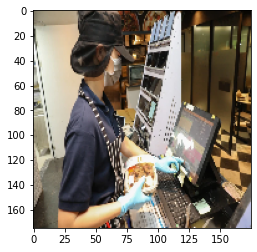

In [38]:
img_np = np.empty((3,175,175,3))

img = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo.jpg", target_size=(175, 175))
x = img_to_array(img)
plt.imshow(img)
img = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img = preprocess_input(img)

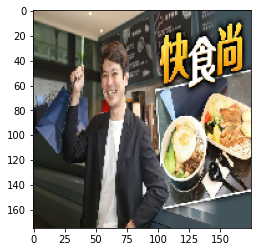

In [39]:
img2 = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo2.jpg", target_size=(175, 175))
x = img_to_array(img2)
plt.imshow(img2)
img2 = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img2 = preprocess_input(img2)

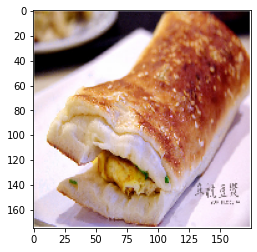

In [40]:
img3 = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo3.jpg", target_size=(175, 175))
x = img_to_array(img3)
plt.imshow(img3)
img3 = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img3 = preprocess_input(img3)

In [41]:
img_np[0] = img
img_np[1] = img2
img_np[2] = img3

In [42]:
result = model.predict(img_np)
np.set_printoptions(suppress=True, precision=40)
print(result)
maxindex = np.argmax(result, axis = 1)
print(maxindex)

[[0.986984      0.020810217  ]
 [0.64085567    0.46845388   ]
 [0.00007703296 0.9999113    ]]
[0 0 1]
